<a href="https://colab.research.google.com/github/EmiliaComputing/DataScience/blob/main/ChessAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chess game analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading data

In [3]:
chess_games = pd.read_csv("games.csv")
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5.0
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4.0
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3.0
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3.0
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5.0


In [4]:
chess_games.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,19233,19233,1.923300e+04,1.923300e+04,19233.000000,19233,19233,19233,19233,19233.000000,19233,19233.000000,19233,19232,19232,19232.000000
unique,18353,2,NaN,NaN,NaN,4,3,398,9103,NaN,9004,NaN,18163,360,1452,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,15507,NaN,NaN,NaN,10662,9601,7325,72,NaN,82,NaN,27,990,364,NaN
mean,NaN,NaN,1.482837e+12,1.482838e+12,60.283419,NaN,NaN,NaN,NaN,1593.552332,NaN,1585.174856,NaN,NaN,NaN,4.789101
std,NaN,NaN,2.884604e+10,2.884592e+10,33.568600,NaN,NaN,NaN,NaN,290.843789,NaN,290.103858,NaN,NaN,NaN,2.772130
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.476379e+12,1.476380e+12,37.000000,NaN,NaN,NaN,NaN,1394.000000,NaN,1388.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.495151e+12,1.495152e+12,55.000000,NaN,NaN,NaN,NaN,1562.000000,NaN,1556.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503120e+12,1.503120e+12,79.000000,NaN,NaN,NaN,NaN,1787.000000,NaN,1777.000000,NaN,NaN,NaN,6.000000


Plotting data

In [5]:
victories = chess_games.victory_status.value_counts()

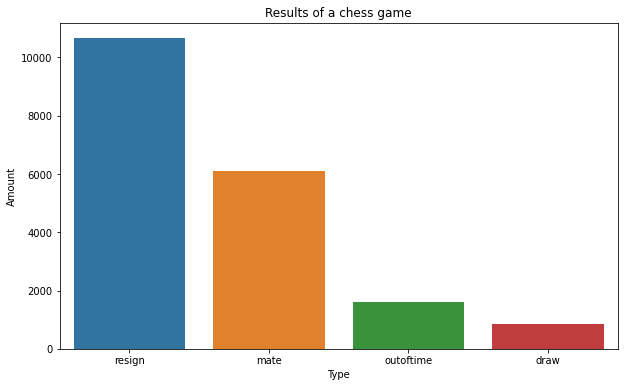

In [6]:
plt.figure(figsize=(10, 6))
plt.title("Results of a chess game")
plt.xlabel("Type")
plt.ylabel("Amount")
sns.barplot(x=victories.index, y=victories.values)

In [7]:
ratings = chess_games.white_rating.value_counts()

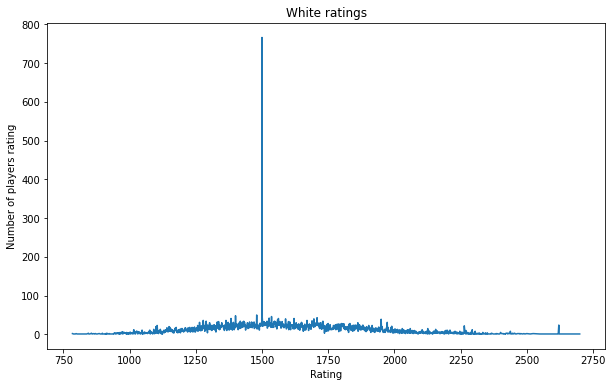

In [8]:
plt.figure(figsize=(10, 6))
plt.title("White ratings")
plt.xlabel("Rating")
plt.ylabel("Number of players rating")
sns.lineplot(x=ratings.index, y=ratings.values)

Spike at 1500 is because it is the rating which new players start off with.

In [9]:
openings = chess_games.opening_name.value_counts()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

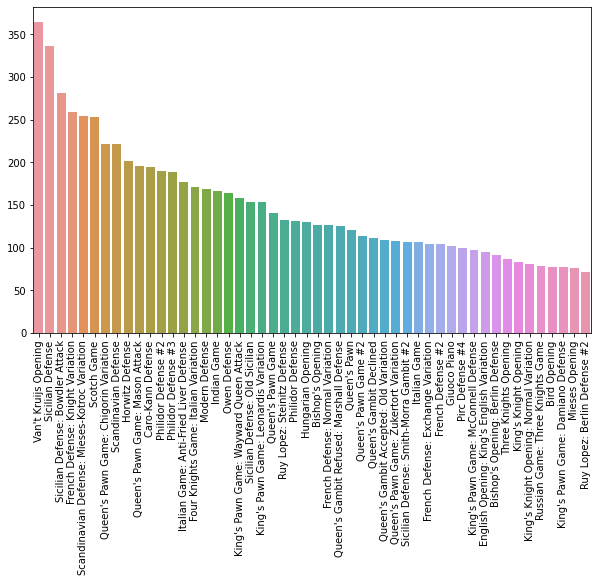

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=openings[:50].index, y=openings[:50].values)
plt.xticks(rotation=90)